In [1]:
#Import the Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = "C:/Users/parth/Desktop/Git/Projects/Titanic/"


We will start with reading the Train and Test files. We will then check their different columns and data.


In [167]:
#Read the Train file and save it as Pandas DataFrame
train_df = pd.read_csv(path+"train.csv")

#This will show the initial rows of Train Data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
#Let's see the Train Data Details
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


 
Train has total 891 rows, 12 columns. "Survived" is the Label Data.
Age has 714 rows, Cabin has 204 rows and Embarked has 889 rows, thus missing 177, 687 and 2 rows respectively.



Let's check the details of Test Data.


In [169]:
#Read the Test file and save it as Pandas DataFrame
test_df = pd.read_csv(path+"test.csv")

#This will show the initial rows of Train Data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [170]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB



Test has total 418 rows, 11 columns. "Survived" is the Column we need to predict. 
Age has 332 rows, Cabin has 91 rows and Fare has 417 rows, thus missing 86, 327 and 1 rows respectively.


Now that we checked the Train and Test Data, we need to do the following tasks:
1. Impute the missing Values
2. Visualize Every Feature of the Data

Whatever changes we will make to the Features, we need do it in both Train and Test Data. So, we will combine the Train and Test Data to make it easier.

In [248]:
#Add None Data to a new Survived column in Test Data
test_df['Survived'] = [None]*418

##Join Train and Test Data to form Combine Data Frame
combine_df = pd.concat([train_df,test_df], axis = 0)

print(combine_df.info())
combine_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null object
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB
None


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450



Let's visualize all the columns one by one. We will impute missing values on the way.
We will start with the test label data.


0    549
1    342
Name: Survived, dtype: int64


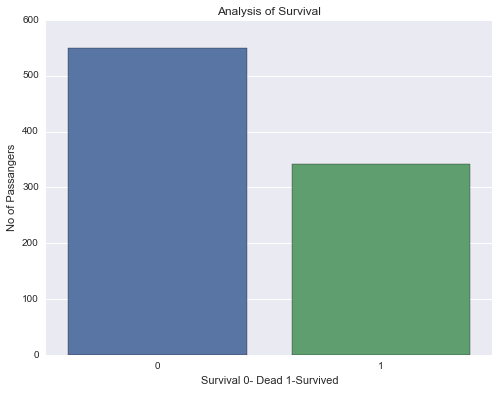

In [249]:
Survived_count = train_df['Survived'].value_counts()
print(Survived_count)

plt.figure(figsize=(8,6))
sns.barplot(Survived_count.index,Survived_count.values)
plt.xlabel("Survival 0- Dead 1-Survived")
plt.ylabel("No of Passangers")
plt.title("Analysis of Survival")
plt.show()

From the Graph :- There is a very high probability of death(Tragic). 

We will keep a list of columns we will choose for our model. At first, we will select all the columns and then remove the ones we do not need.

In [250]:
selected_Columns = combine_df.columns.values.tolist()

## Survived is the column we will predict and Passanger Id is not of much significance. So, we will remove these two.
selected_Columns.remove('Survived')
selected_Columns.remove('PassengerId')
print(selected_Columns)

['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Ticket']



Let's check the distribution of Gender in the Train Data.


male      577
female    314
Name: Sex, dtype: int64


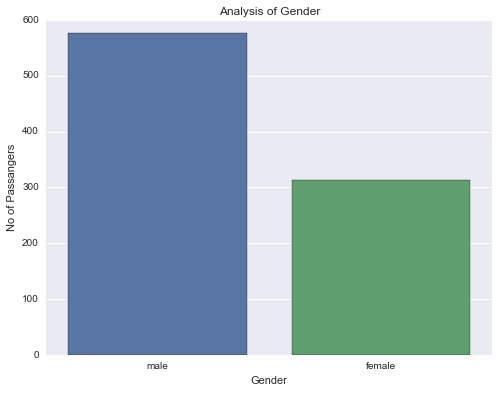

In [251]:
Gender_count = train_df['Sex'].value_counts()
print(Gender_count)

plt.figure(figsize=(8,6))
sns.barplot(Gender_count.index,Gender_count.values)
plt.xlabel("Gender")
plt.ylabel("No of Passangers")
plt.title("Analysis of Gender")
plt.show()

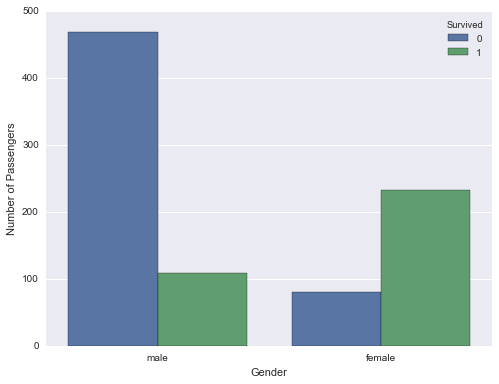

In [252]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')
plt.show()


As seen from the above graph, 'Sex' is a very important factor. Very few Male have survived(Approx 5/6th died). There is a very good rate of Survival among Female.

Next factor we analyse is: Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64


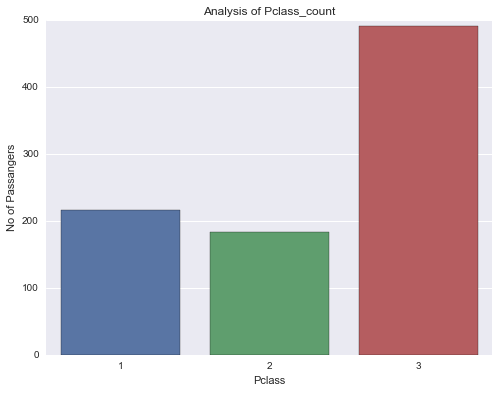

In [253]:
Pclass_count = train_df['Pclass'].value_counts()
print(Pclass_count)

plt.figure(figsize=(8,6))
sns.barplot(Pclass_count.index,Pclass_count.values)
plt.xlabel("Pclass")
plt.ylabel("No of Passangers")
plt.title("Analysis of Pclass_count")
plt.show()

Most of the passengers were of class 3, followed by 1 and 2.

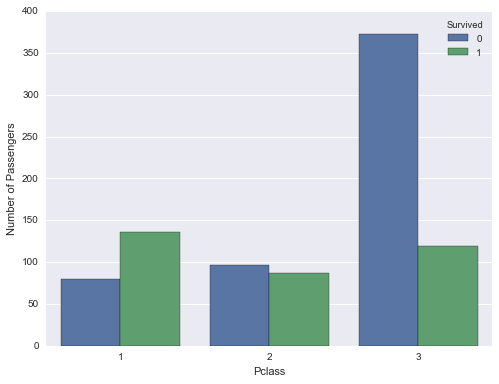

In [254]:
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.ylabel('Number of Passengers')
plt.xlabel('Pclass')
plt.show()

There is a high degree of fatality in the case of class 3 passengers. However, a good survival ratio among class 1. Class 2- Almost equal probability.

Next: Parch

0    678
1    118
2     80
3     15
Name: Parch, dtype: int64


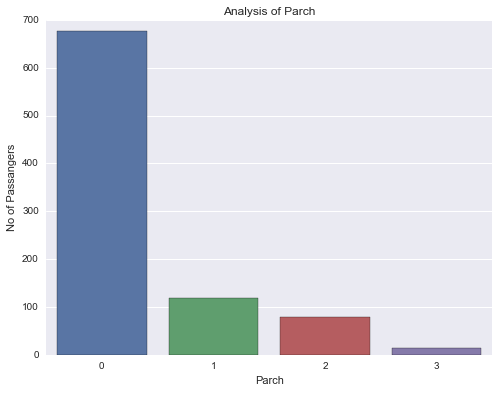

In [255]:
Parch_count = train_df['Parch'].value_counts()
print(Parch_count)

plt.figure(figsize=(8,6))
sns.barplot(Parch_count.index,Parch_count.values)
plt.xlabel("Parch")
plt.ylabel("No of Passangers")
plt.title("Analysis of Parch")
plt.show()

Most of the values reside in 0,1,2. Most values 0 shows most of the people came alone.

We can make the values greater than 2 as 3.

C:\Users\parth\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


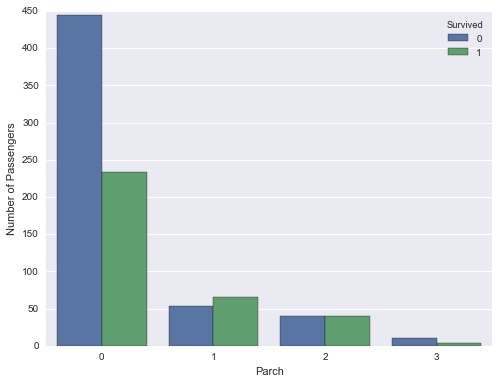

In [256]:
train_df['Parch'].ix[train_df['Parch']>2] = 3
combine_df['Parch'].ix[combine_df['Parch']>2] = 3

plt.figure(figsize=(8,6))
sns.countplot(x='Parch', hue='Survived', data=train_df)
plt.ylabel('Number of Passengers')
plt.xlabel('Parch')
plt.show()

Person who has 1 0r 2 have higher survival ratio than the person who is not a parent nor has a child.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


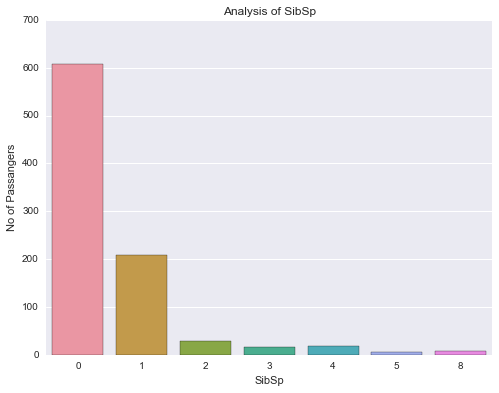

In [257]:
SibSp_count = train_df['SibSp'].value_counts()
print(SibSp_count)

plt.figure(figsize=(8,6))
sns.barplot(SibSp_count.index,SibSp_count.values)
plt.xlabel("SibSp")
plt.ylabel("No of Passangers")
plt.title("Analysis of SibSp")
plt.show()

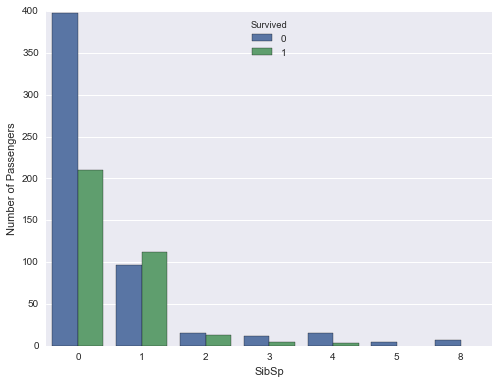

In [258]:
plt.figure(figsize=(8,6))
sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.ylabel('Number of Passengers')
plt.xlabel('SibSp')
plt.show()

We can assume that person having Siblings greater than 4 have very less chance of Survival rate. We can make all values greater than 3 as 4. Person with only 1 sibling survived most.

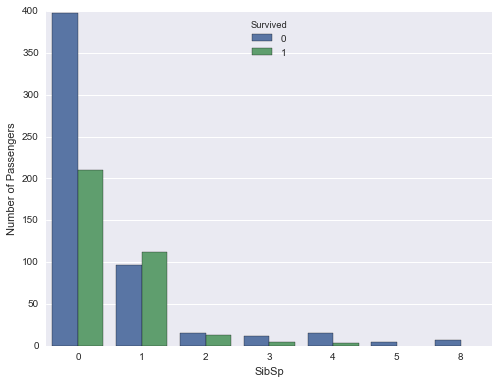

In [259]:
#train_df['SibSp'].ix[train_df['SibSp']>3] = 4
#combine_df['SibSp'].ix[combine_df['SibSp']>3] = 4

plt.figure(figsize=(8,6))
sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.ylabel('Number of Passengers')
plt.xlabel('SibSp')
plt.show()

The next column to check is: Fare.
Fare has one row missing. We need to impute that. But, luckily Train Data has all the data. So, let's analyze the column and then impute it.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


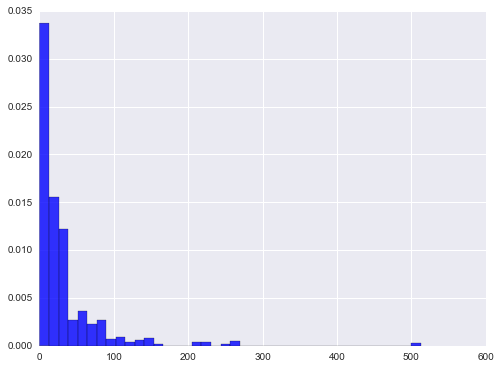

In [260]:
plt.figure(figsize=(8,6))
print(train_df['Fare'].describe())
#plt.subplot(121)
plt.hist(train_df['Fare'],bins=40,range=(0,train_df['Fare'].describe()[-1]),normed=True,color='blue',alpha=0.8)
plt.show()

There seems to be some outliers where ticket prices are very high. Let's check the rows where Fare is higher than 200.

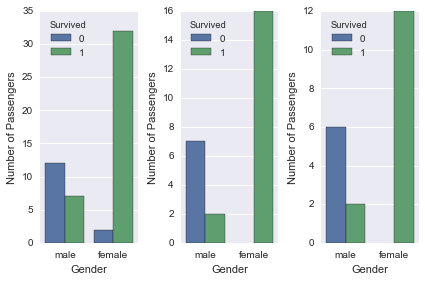

In [261]:
plt.subplot(1,3,1)
temp_df = train_df.ix[train_df['Fare']>100]
sns.countplot(x='Sex', hue='Survived', data=temp_df)
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')

plt.subplot(1,3,2)
temp_df = train_df.ix[train_df['Fare']>152]
sns.countplot(x='Sex', hue='Survived', data=temp_df)
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')

plt.subplot(1,3,3)
temp_df = train_df.ix[train_df['Fare']>200]
sns.countplot(x='Sex', hue='Survived', data=temp_df)
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

We can see that above Fare price 152, the pattern of the male and Female Survival rate is almost same. So, we can make the values as 152.

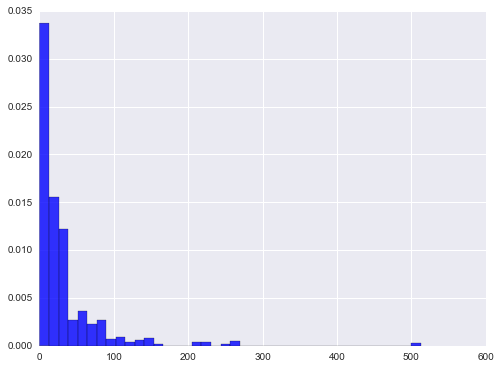

In [262]:
#train_df['Fare'].ix[train_df['Fare']>151] = 152
#combine_df['Fare'].ix[combine_df['Fare']>151] = 152

plt.figure(figsize=(8,6))
plt.hist(train_df['Fare'],bins=40,range=(0,train_df['Fare'].describe()[-1]),normed=True,color='blue',alpha=0.8)
plt.show()

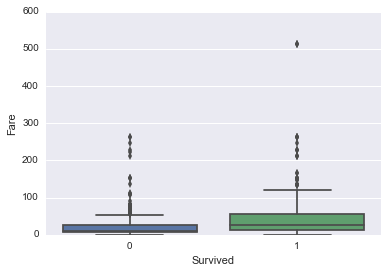

In [263]:
sns.boxplot(x="Survived",y="Fare",data=train_df)
plt.show()

Most of the people who died have tickets with less Fair. But, people with high fare ticket have more survival rate.

Let's check the detaif the person whose Fare is not available.

In [264]:
combine_df[combine_df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,None,3701


In [265]:
##We can find the Fares for passengers who are aged and are of class 3, male and have Embarked t S
temp_df = combine_df[(combine_df['Pclass']==3) & (combine_df['Sex']=='male') & 
                     (combine_df['Embarked']=='S') & (combine_df['Age'] > 50)]
temp_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
94,59.0,NaN,S,7.2500,"Coxon, Mr. Daniel",0,95,3,male,0,0,364500
152,55.5,NaN,S,8.0500,"Meo, Mr. Alfonzo",0,153,3,male,0,0,A.5. 11206
222,51.0,NaN,S,8.0500,"Green, Mr. George Henry",0,223,3,male,0,0,21440
326,61.0,NaN,S,6.2375,"Nysveen, Mr. Johan Hansen",0,327,3,male,0,0,345364
406,51.0,NaN,S,7.7500,"Widegren, Mr. Carl/Charles Peter",0,407,3,male,0,0,347064
631,51.0,NaN,S,7.0542,"Lundahl, Mr. Johan Svensson",0,632,3,male,0,0,347743
851,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,852,3,male,0,0,347060
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,None,3701


We can update the Fare value as the average of the these values.

In [266]:
combine_df['Fare'][combine_df['Fare'].isnull()] = temp_df['Fare'].mean()
print(combine_df[combine_df['Fare'].isnull()].any(1))

Series([], dtype: bool)


C:\Users\parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Next let's analyze Embarked Features. We will analyze the part where Embarked is not null. Then we will impute the 2 missing values based on Analyzed Data.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


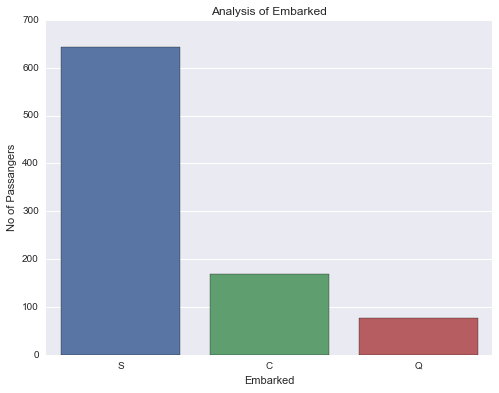

In [267]:
temp_df = train_df[train_df['Embarked'].notnull()]

Embarked_count = train_df['Embarked'].value_counts()
print(Embarked_count)

plt.figure(figsize=(8,6))
sns.barplot(Embarked_count.index,Embarked_count.values)
plt.xlabel("Embarked")
plt.ylabel("No of Passangers")
plt.title("Analysis of Embarked")
plt.show()

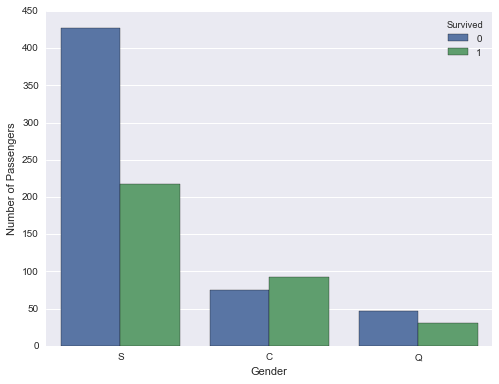

In [268]:
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', hue='Survived', data=temp_df)
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')

#del temp_df

People who have embarked at City C have higher rate of Survival. People emarking at City S have half survival rate and city Q has also more death ration, but less than city S.

We can further analyze city S.

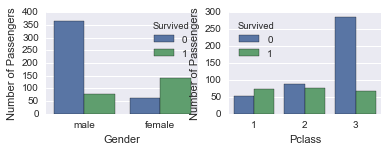

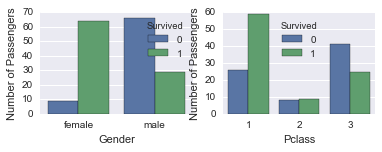

In [269]:
temp_df2 = temp_df[temp_df['Embarked']=='S']
plt.subplot(221)
sns.countplot(x='Sex', hue='Survived', data=temp_df2)
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')

plt.subplot(222)
sns.countplot(x='Pclass', hue='Survived', data=temp_df2)
plt.ylabel('Number of Passengers')
plt.xlabel('Pclass')
plt.show()

temp_df2 = temp_df[temp_df['Embarked']=='C']
plt.subplot(223)
sns.countplot(x='Sex', hue='Survived', data=temp_df2)
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')

plt.subplot(224)
sns.countplot(x='Pclass', hue='Survived', data=temp_df2)
plt.ylabel('Number of Passengers')
plt.xlabel('Pclass')
plt.show()

del temp_df2

CIty S- shows most of the passengers embarked are of class 3 and less female population. Hence, more casuality. 
City C- shows a more number of class 1 passengers and high female ratio. Hence, less casuality.

Let's try to impute the two missing rows.

In [270]:
combine_df[combine_df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572


Both these ladies have paid high ticket price and Survived. They are both of Pclass 1. We have such people at all the three cities. So, we will impute their value as city 'S' which is most occuring.

In [271]:
combine_df['Embarked'][(combine_df['Cabin']=='B28')] = 'S'
print(combine_df[combine_df['Embarked'].isnull()])

Empty DataFrame
Columns: [Age, Cabin, Embarked, Fare, Name, Parch, PassengerId, Pclass, Sex, SibSp, Survived, Ticket]
Index: []


C:\Users\parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [272]:
combine_df[combine_df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


Cabin has lots of Null values. So imputing its values will have values which may not be appropriate. 
Hence, we will drop this feature.

In [273]:
selected_Columns.remove('Cabin')

Ticket number does not seem to fetch any new information. It can however generate class. But we have Pclass for that already. So we will ignore Ticket too.

In [274]:
selected_Columns.remove('Ticket')

Name is another factor. Let's check what are the common words in Name. 

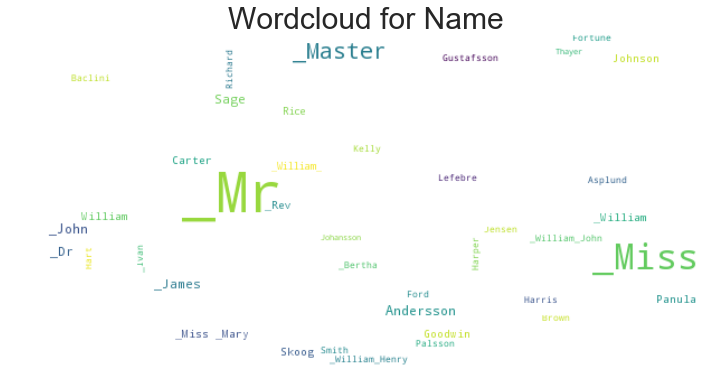

In [275]:
from wordcloud import WordCloud

text_Name = ''

for ind, row in train_df.iterrows():
    text_Name = " ".join([text_Name,"_".join(row['Name'].strip().split(" "))])

text_Name = text_Name.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_Name)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Name", fontsize=30)
plt.axis("off")
plt.show()

Name does no seem to bring new features, but it will be very useful in predicting the Age which has lots of empty rows.

In [276]:
import re

#A function to get the title from a name.
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = combine_df["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Lady          1
Countess      1
Jonkheer      1
Capt          1
Dona          1
Mme           1
Don           1
Sir           1
Name: Name, dtype: int64


In [277]:
combine_df['titles'] = titles
print(combine_df.titles.unique())

MrList = ['Rev','Dr','Col','Major','Sir','Jonkheer','Don','Capt']
MsList = ['Ms','Mlle']
MrsList = ['Lady','Mme','Dona','Countess']

for ind, row in combine_df.iterrows():
    if row['titles'] in MrList:
        #row['titles'] = 'Mr'
        #print(combine_df.at[ind,'titles'])
        combine_df.at[ind,'titles'] = 'Mr'
    if row['titles'] in MsList:
        combine_df.at[ind,'titles'] = 'Miss'
    if row['titles'] in MrsList:
        combine_df.at[ind,'titles'] = 'Mrs'

print(combine_df.titles.unique())
print(pd.value_counts(combine_df["titles"]))

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']
['Mr' 'Mrs' 'Miss' 'Master']
Mr        785
Miss      263
Mrs       201
Master     60
Name: titles, dtype: int64


The last and most important feature is Age. But,we have around 263 rows where Age is missing.

Let's Analyze the missing rows first.

In [278]:
temp_df = combine_df[combine_df['Age'].isnull()]

Mr        178
Miss       51
Mrs        26
Master      8
Name: titles, dtype: int64


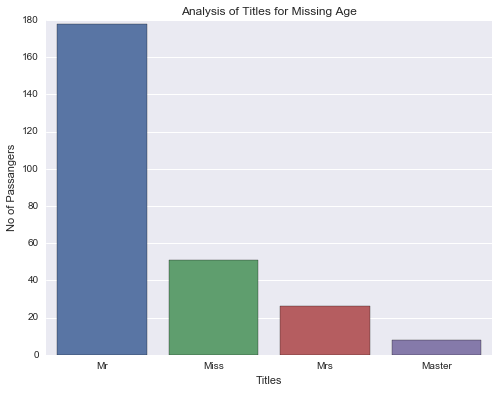

In [279]:
Titles_count = temp_df['titles'].value_counts()
print(Titles_count)

plt.figure(figsize=(8,6))
sns.barplot(Titles_count.index,Titles_count.values)
plt.xlabel("Titles")
plt.ylabel("No of Passangers")
plt.title("Analysis of Titles for Missing Age")
plt.show()

There are very few rows missing for passengers with Title 'Master' and 'Mrs'. So, for them we can impute the Age as the mean or median of other Master and Mrs passengers ages respectively.

Let's check the missing Master Data.

In [280]:
temp_dfMaster = temp_df[temp_df['titles'] == 'Master']
temp_dfMaster

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,titles
65,NaN,NaN,C,15.2458,"Moubarek, Master. Gerios",1,66,3,male,1,1,2661,Master
159,NaN,NaN,S,69.5500,"Sage, Master. Thomas Henry",2,160,3,male,8,0,CA. 2343,Master
176,NaN,NaN,S,25.4667,"Lefebre, Master. Henry Forbes",1,177,3,male,3,0,4133,Master
709,NaN,NaN,C,15.2458,"Moubarek, Master. Halim Gonios (""William George"")",1,710,3,male,1,1,2661,Master
244,NaN,NaN,S,23.4500,"Johnston, Master. William Arthur Willie""""",2,1136,3,male,1,None,W./C. 6607,Master
339,NaN,NaN,C,7.2292,"Betros, Master. Seman",0,1231,3,male,0,None,2622,Master
344,NaN,NaN,S,14.5000,"van Billiard, Master. James William",1,1236,3,male,1,None,A/5. 851,Master
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,None,2668,Master


All the empty rows are for Pclass- 3. Let's find the mean and median ages of all Passengers with Pclass 3 and Title Master.

In [281]:
print(combine_df['Age'][(combine_df['Pclass'] == 3) & (combine_df['titles'] == 'Master')
                       & (combine_df['Age'].notnull())].mean())
combine_df['Age'][(combine_df['Pclass'] == 3) & (combine_df['titles'] == 'Master')
                & (combine_df['Age'].notnull()) ].median()

6.23138888888889


6.0

In [282]:
##Replace with the Mean Value
combine_df['Age'][(combine_df['Pclass'] == 3) & (combine_df['titles'] == 'Master')
                & (combine_df['Age'].isnull())] = combine_df['Age'][(combine_df['Pclass'] == 3) & (combine_df['titles'] == 'Master')
                       & (combine_df['Age'].notnull())].mean()

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mr      178
Miss     51
Mrs      26
Name: titles, dtype: int64


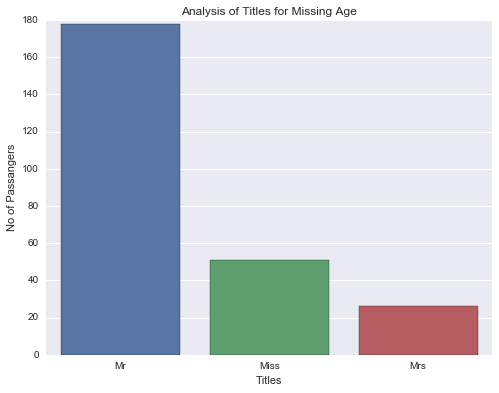

In [283]:
temp_df = combine_df[combine_df['Age'].isnull()]
Titles_count = temp_df['titles'].value_counts()
print(Titles_count)

plt.figure(figsize=(8,6))
sns.barplot(Titles_count.index,Titles_count.values)
plt.xlabel("Titles")
plt.ylabel("No of Passangers")
plt.title("Analysis of Titles for Missing Age")
plt.show()

Let's see the details of Mrs data.

In [284]:
temp_dfMrs = combine_df[(combine_df['titles'] == 'Mrs') & (combine_df['Age'].isnull())]
temp_dfMrs

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,titles
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1,2649,Mrs
31,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1,PC 17569,Mrs
140,NaN,NaN,C,15.2458,"Boulos, Mrs. Joseph (Sultana)",2,141,3,female,0,0,2678,Mrs
166,NaN,E33,S,55.0000,"Chibnall, Mrs. (Edith Martha Bowerman)",1,167,1,female,0,1,113505,Mrs
186,NaN,NaN,Q,15.5000,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",0,187,3,female,1,1,370365,Mrs
256,NaN,NaN,C,79.2000,"Thorne, Mrs. Gertrude Maybelle",0,257,1,female,0,1,PC 17585,Mrs
334,NaN,NaN,S,133.6500,"Frauenthal, Mrs. Henry William (Clara Heinshei...",0,335,1,female,1,1,PC 17611,Mrs
347,NaN,NaN,S,16.1000,"Davison, Mrs. Thomas Henry (Mary E Finck)",0,348,3,female,1,1,386525,Mrs
367,NaN,NaN,C,7.2292,"Moussa, Mrs. (Mantoura Boulos)",0,368,3,female,0,1,2626,Mrs
375,NaN,NaN,C,82.1708,"Meyer, Mrs. Edgar Joseph (Leila Saks)",0,376,1,female,1,1,PC 17604,Mrs


We will replace the Age value as per Pclass of Title Mrs.

In [285]:
def imputeMrsAge(cls):
    ##Replace with the Mean Value
    combine_df['Age'][(combine_df['Pclass'] == cls) & (combine_df['titles'] == 'Mrs')
                & (combine_df['Age'].isnull())] = combine_df['Age'][(combine_df['Pclass'] == cls)&(combine_df['titles'] == 'Mrs')
                       & (combine_df['Age'].notnull())].mean()

imputeMrsAge(1)
imputeMrsAge(2)
imputeMrsAge(3)

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mr      178
Miss     51
Name: titles, dtype: int64


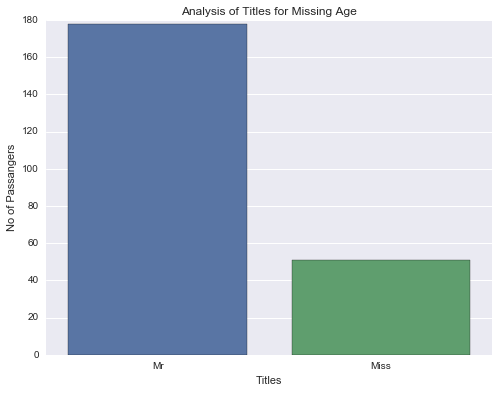

In [286]:
temp_df = combine_df[combine_df['Age'].isnull()]
Titles_count = temp_df['titles'].value_counts()
print(Titles_count)

plt.figure(figsize=(8,6))
sns.barplot(Titles_count.index,Titles_count.values)
plt.xlabel("Titles")
plt.ylabel("No of Passangers")
plt.title("Analysis of Titles for Missing Age")
plt.show()

For these two titles- Mr and Miss- We will use a model to predict the values. But before that we will create another column called FareIndi which will be Fare per Person that is Fare/(1+Parch+SibSp). 1 is for the person itself.

In [287]:
combine_df['FamilySize'] = 1+ combine_df['Parch'] + combine_df['SibSp']
combine_df['FareIndi'] = combine_df['Fare'] / combine_df['FamilySize']
combine_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,titles,FamilySize,FareIndi
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,2,3.62500
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,2,35.64165
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,1,7.92500
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,2,26.55000
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,1,8.05000


In [293]:
#data = combine_df
#data['Cabin'] = str(data['Cabin'])

combine_df.Cabin.fillna('0', inplace=True)
combine_df.loc[data.Cabin.str[0] == 'A', 'Cabin'] = 1
combine_df.loc[data.Cabin.str[0] == 'B', 'Cabin'] = 2
combine_df.loc[data.Cabin.str[0] == 'C', 'Cabin'] = 3
combine_df.loc[data.Cabin.str[0] == 'D', 'Cabin'] = 4
combine_df.loc[data.Cabin.str[0] == 'E', 'Cabin'] = 5
combine_df.loc[data.Cabin.str[0] == 'F', 'Cabin'] = 6
combine_df.loc[data.Cabin.str[0] == 'G', 'Cabin'] = 7
combine_df.loc[data.Cabin.str[0] == 'T', 'Cabin'] = 8

#print(data['Cabin'])

In [294]:
print(list(combine_df['Cabin']))

['0      0\n1      0\n2      0\n3      0\n4      0\n5      0\n6      0\n7      0\n8      0\n9      0\n10     0\n11     0\n12     0\n13     0\n14     0\n15     0\n16     0\n17     0\n18     0\n19     0\n20     0\n21     0\n22     0\n23     0\n24     0\n25     0\n26     0\n27     0\n28     0\n29     0\n      ..\n388    0\n389    0\n390    0\n391    0\n392    0\n393    0\n394    0\n395    0\n396    0\n397    0\n398    0\n399    0\n400    0\n401    0\n402    0\n403    0\n404    0\n405    0\n406    0\n407    0\n408    0\n409    0\n410    0\n411    0\n412    0\n413    0\n414    0\n415    0\n416    0\n417    0\nName: Cabin, dtype: int64', '0      0\n1      0\n2      0\n3      0\n4      0\n5      0\n6      0\n7      0\n8      0\n9      0\n10     0\n11     0\n12     0\n13     0\n14     0\n15     0\n16     0\n17     0\n18     0\n19     0\n20     0\n21     0\n22     0\n23     0\n24     0\n25     0\n26     0\n27     0\n28     0\n29     0\n      ..\n388    0\n389    0\n390    0\n391    0\n392    0\

Before we run the model, we need to convert the Categorical Variables to Numbers.

In [211]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Parch','Pclass','Sex','SibSp',"titles","FamilySize"]

for col in cat_vars:
    combine_df[col]=labelEnc.fit_transform(combine_df[col])
    
combine_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,titles,FamilySize,FareIndi
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0,A/5 21171,2,1,3.62500
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1,PC 17599,3,1,35.64165
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1,STON/O2. 3101282,1,0,7.92500
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1,113803,3,1,26.55000
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0,373450,2,0,8.05000


In [212]:
ageFeatures = ['Embarked','Parch','Pclass','Sex','SibSp',"Fare"]

trainAgeF = (combine_df[combine_df['Age'].notnull()])[ageFeatures]
trainAgeL = (combine_df[combine_df['Age'].notnull()])['Age']
testAgeF = (combine_df[combine_df['Age'].isnull()])[ageFeatures]

print(trainAgeF.head())
print(testAgeF.head())
print(trainAgeL.head())

   Embarked  Parch  Pclass  Sex  SibSp     Fare
0         2      0       2    1      1   7.2500
1         0      0       0    0      1  71.2833
2         2      0       2    0      0   7.9250
3         2      0       0    0      1  53.1000
4         2      0       2    1      0   8.0500
    Embarked  Parch  Pclass  Sex  SibSp     Fare
5          1      0       2    1      0   8.4583
17         2      0       1    1      0  13.0000
26         0      0       2    1      0   7.2250
28         1      0       2    0      0   7.8792
29         2      0       2    1      0   7.8958
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [213]:
from sklearn.ensemble import RandomForestRegressor
rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
rtr.fit(trainAgeF, trainAgeL)

# Use the fitted model to predict the missing values
predictedAges = rtr.predict(testAgeF)

##Replace the NA values with the predicted values
combine_df['Age'][combine_df['Age'].isnull()] = predictedAges

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [214]:
combine_df[combine_df['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,titles,FamilySize,FareIndi


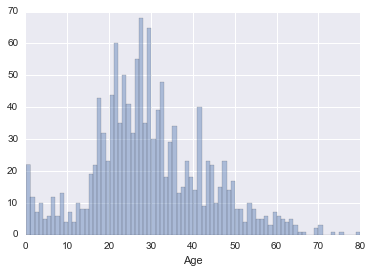

In [215]:
##Distbution of Age
sns.distplot(combine_df['Age'],bins=80,kde=False)
plt.show()

Let's analyze Age data with Survival for Train Data.

In [216]:
combine_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,titles,FamilySize,FareIndi
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0,A/5 21171,2,1,3.62500
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1,PC 17599,3,1,35.64165
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1,STON/O2. 3101282,1,0,7.92500
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1,113803,3,1,26.55000
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0,373450,2,0,8.05000


# Feature Scaling

In [218]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(combine_df[['Age', 'Fare','FareIndi']])
df_std = std_scale.transform(combine_df[['Age', 'Fare','FareIndi']])

Let's check the Correlation among the features if any

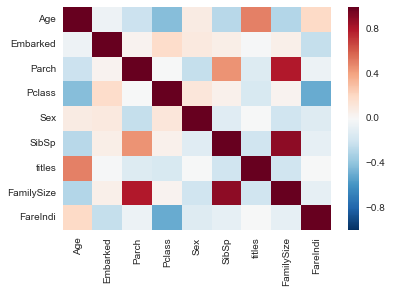

In [219]:
cor_matrix = combine_df[selected_Columns].corr()
sns.heatmap(cor_matrix)
plt.show()

There are some correlation between Family size and Parch and Family Size and SibSp. We will decide whom to keep based on our Variable Importance Matrix.

Now that all the Analysis has been done, let's divide the combine data to train and test.

In [220]:
from sklearn.cross_validation import train_test_split

Train = combine_df[combine_df['Survived'].notnull()]
Test = combine_df[combine_df['Survived'].isnull()]

#print(Train.head())
#print(Test.head())

X_train, X_val, Y_train, Y_val = train_test_split(Train[selected_Columns], Train['Survived'], test_size=0.33)
X_test = Test[selected_Columns]

In [221]:
clf = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
clf.fit(X_train, Y_train)

# Use the fitted model to predict the missing values
predictedAges = clf.predict(X_val)
predictedAges[predictedAges > .5] = 1
predictedAges[predictedAges <=.5] = 0

accuracy = sum(Y_val==predictedAges)/len(Y_val)
accuracy

0.77966101694915257

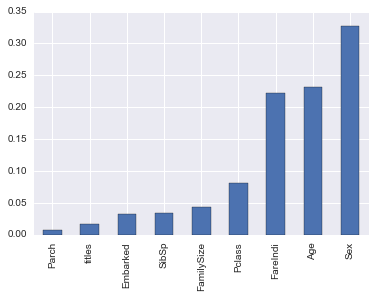

In [222]:
pd.Series(index = selected_Columns, data = clf.feature_importances_).sort_values().plot(kind = 'bar')
plt.show()

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [700,1000,1500,2000],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, list(Y_train.values))
print (CV_rfc.best_params_)
print(CV_rfc.best_estimator_)

{'n_estimators': 2000, 'max_features': 'sqrt'}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=True,
            random_state=None, verbose=0, warm_start=False)


In [224]:
selected_Columns

['Age',
 'Embarked',
 'Parch',
 'Pclass',
 'Sex',
 'SibSp',
 'titles',
 'FamilySize',
 'FareIndi']

In [225]:
#selected_Columns.append('Fare')
selected_Columns.remove('Parch')
selected_Columns.remove('SibSp')
selected_Columns.remove('FareIndi')
print(selected_Columns)

['Age', 'Embarked', 'Pclass', 'Sex', 'titles', 'FamilySize']


In [226]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
clf.fit(Train[selected_Columns],list(Train['Survived'].values))
predictedVal = clf.predict(Test[selected_Columns])

In [227]:
submission = pd.DataFrame({
        "PassengerId": Test["PassengerId"],
        "Survived": predictedVal
    })

submission.to_csv(path+"rf_submission_2.csv", index=False)